## Load libraries

In [1]:
#%matplotlib notebook
#import yt
from yt import load
#yt.toggle_interactivity()
import caesar
import os
import numpy as np
import matplotlib.pyplot as plt

## Load snapshot into yt

In [2]:
# First we load your snapshot into yt
snap_prefix = 'simba_s12.5n128'
snap_num = '0015'
#cali_num = 'cali_0000'
cali_num = ''
#snap_dir = '/scratch/b/babul/aspadawe/swift_tests/cali_simba'
snap_dir = '/scratch/b/babul/aspadawe/swift_tests/s12.5n128_simba'
snap = os.path.join(snap_dir, cali_num, snap_prefix+'_'+snap_num+'.hdf5')
print(snap)
ds = load(snap)
#redshift = ds.parameters['Redshift'][0]
#print('z=%s' % (redshift))

/scratch/b/babul/aspadawe/swift_tests/s12.5n128_simba/simba_s12.5n128_0015.hdf5


yt : [INFO     ] 2023-06-21 22:01:03,123 SwiftDataset!
yt : [INFO     ] 2023-06-21 22:01:03,138 Calculating time from 1.418e-02 to be 4.375e+17 seconds
yt : [INFO     ] 2023-06-21 22:01:03,221 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-21 22:01:03,288 Parameters: current_time              = 4.37485659429611e+17 s
yt : [INFO     ] 2023-06-21 22:01:03,289 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-21 22:01:03,291 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-21 22:01:03,292 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-21 22:01:03,293 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-21 22:01:03,294 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2023-06-21 22:01:03,295 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-21 22:01:03,296 Parameters: omega_matter              = 0

In [3]:
#h = ds.parameters['hubble_constant']
#h = 0.68
Lcom = ds.domain_width.in_units("Mpc")
#print(Lcom * 0.68)
#Vcom = Lcom[0] * Lcom[1] * Lcom[2]
Vcom = ds.domain_width.in_units("Mpccm").prod()
print(Lcom)
print("Comoving Volume=%s" % Vcom)

[18.38235294 18.38235294 18.38235294] Mpc
Comoving Volume=6211.597414298313 Mpccm**3


In [69]:
H0 = ds.cosmology.hubble_constant
omega_matter = ds.cosmology.omega_matter
omega_lambda = ds.cosmology.omega_lambda
omega_rad = ds.cosmology.omega_radiation
omega_curve = ds.cosmology.omega_curvature
print(h0)
print(omega_matter)
print(omega_lambda)
print(omega_rad)
print(omega_curve)
print(ds.cosmology.unit_system)
print(ds.cosmology.use_dark_factor)

0.68 100*km/(Mpc*s)
0.3
0.7
0.0
0.0
cgs
False


In [4]:
ds.field_list

yt : [INFO     ] 2023-06-21 22:01:05,531 Allocating for 4.194e+06 particles
Loading particle index: 100%|██████████| 8/8 [00:00<00:00, 2832.79it/s]


[('PartType0', 'AtomicHydrogenMasses'),
 ('PartType0', 'AveragedStarFormationRates'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Densities'),
 ('PartType0', 'DensitiesAtLastAGNEvent'),
 ('PartType0', 'DensitiesBeforeLastAGNEvent'),
 ('PartType0', 'ElectronNumberDensities'),
 ('PartType0', 'ElementMassFractions'),
 ('PartType0', 'EnergiesReceivedFromAGNFeedback'),
 ('PartType0', 'Entropies'),
 ('PartType0', 'EntropiesAtLastAGNEvent'),
 ('PartType0', 'EntropiesBeforeLastAGNEvent'),
 ('PartType0', 'FOFGroupIDs'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'HeatedByAGNFeedback'),
 ('PartType0', 'HeatedBySNIIFeedback'),
 ('PartType0', 'InternalEnergies'),
 ('PartType0', 'IronMassFractionsFromSNIa'),
 ('PartType0', 'LastAGNFeedbackScaleFactors'),
 ('PartType0', 'Masses'),
 ('PartType0', 'MassesFromAGB'),
 ('PartType0', 'MassesFromSNII'),
 ('PartType0', 'MassesFromSNIa'),
 ('PartType0', 'MaximalTemperatureScaleFactors'),
 ('PartType0', 'MaximalTemperatures'),
 ('PartType0', 'MetalMassFr

## Load caesar file

In [5]:
# define input file
infile = os.path.join(snap_dir, cali_num, snap_prefix+'_caesar_'+snap_num+'.hdf5')

# load in input file
obj = caesar.load(infile)

yt : [INFO     ] 2023-06-21 22:01:06,950 Opening /scratch/b/babul/aspadawe/swift_tests/s12.5n128_simba/simba_s12.5n128_caesar_0015.hdf5
yt : [INFO     ] 2023-06-21 22:01:07,009 Found 2977 halos
yt : [INFO     ] 2023-06-21 22:01:07,015 Found 365 galaxies


In [6]:
z = obj.simulation.redshift
h = obj.simulation.hubble_constant
#V = obj.simulation.domain_width
#print(V)
#Vcom *= h**(-3)
#Vcom = Vphys * (1+z)**3

print('z=%s' % (z))
print('h=%s' % (h))
print("Comoving Volume=%s" % Vcom)

z=2.220446049250313e-16
h=0.68
Comoving Volume=6211.597414298313 Mpccm**3


In [7]:
obj.galaxies[0].masses

{'H2': unyt_quantity(1.09366654e+08, 'Msun'),
 'H2_30kpc': unyt_quantity(0., 'Msun'),
 'HI': unyt_quantity(3.53858382e+09, 'Msun'),
 'HI_30kpc': unyt_quantity(18335541.52789068, 'Msun'),
 'baryon': unyt_quantity(9.57245029e+10, 'Msun'),
 'bh': unyt_quantity(2.03063002e+09, 'Msun'),
 'bh_30kpc': unyt_quantity(2.03063002e+09, 'Msun'),
 'dm': unyt_quantity(2.03063002e+09, 'Msun'),
 'dm_30kpc': unyt_quantity(4.99344166e+11, 'Msun'),
 'dust': unyt_quantity(0., 'Msun'),
 'gas': unyt_quantity(0., 'Msun'),
 'gas_30kpc': unyt_quantity(7.73903848e+08, 'Msun'),
 'star_30kpc': unyt_quantity(1.01651007e+11, 'Msun'),
 'stellar': unyt_quantity(9.5678079e+10, 'Msun'),
 'total': unyt_quantity(9.77087119e+10, 'Msun')}

## Get galaxy and halo properties from caesar file

In [8]:
halo_tot_masses = np.array([halo.masses['total'] for halo in obj.halos])
log_halo_tot_masses = np.log10(halo_tot_masses)
len(halo_tot_masses)

2977

In [9]:
halo_vir_masses = np.array([halo.virial_quantities['m200c'] for halo in obj.halos])
log_halo_vir_masses = np.log10(halo_vir_masses)
len(halo_vir_masses)

/tmp/ipykernel_235701/1596792048.py:2: RuntimeWarning: divide by zero encountered in log10
  log_halo_vir_masses = np.log10(halo_vir_masses)


2977

In [10]:
halo_dm_masses = np.array([halo.masses['dm'] for halo in obj.halos])
log_halo_dm_masses = np.log10(halo_dm_masses)
len(halo_dm_masses)

/tmp/ipykernel_235701/3264582332.py:2: RuntimeWarning: divide by zero encountered in log10
  log_halo_dm_masses = np.log10(halo_dm_masses)


2977

In [11]:
halo_stellar_masses = np.array([halo.masses['stellar'] for halo in obj.halos])
log_halo_stellar_masses = np.log10(halo_stellar_masses)
len(halo_stellar_masses)

/tmp/ipykernel_235701/2841333300.py:2: RuntimeWarning: divide by zero encountered in log10
  log_halo_stellar_masses = np.log10(halo_stellar_masses)


2977

In [12]:
obj.halos[0].galaxies[0].masses['stellar']

unyt_quantity(9.5678079e+10, 'Msun')

In [13]:
halo_gal_stellar_masses = np.array([sum(gal.masses['stellar'] for gal in halo.galaxies) for halo in obj.halos])
log_halo_gal_stellar_masses = np.log10(halo_gal_stellar_masses)
len(halo_gal_stellar_masses)

/tmp/ipykernel_235701/2315520840.py:2: RuntimeWarning: divide by zero encountered in log10
  log_halo_gal_stellar_masses = np.log10(halo_gal_stellar_masses)


2977

In [14]:
# Does "parent halo" stuff make sense? multiple galaxies have same parent halo, so halos can be multiply counted!!

In [15]:
parent_halo_tot_masses = np.array([gal.halo.masses['total'] for gal in obj.galaxies])
log_parent_halo_tot_masses = np.log10(parent_halo_tot_masses)
len(parent_halo_tot_masses)

365

In [16]:
parent_halo_vir_masses = np.array([gal.halo.virial_quantities['m200c'] for gal in obj.galaxies])
log_parent_halo_vir_masses = np.log10(parent_halo_vir_masses)
len(parent_halo_vir_masses)

365

In [17]:
parent_halo_dm_masses = np.array([gal.halo.masses['dm'] for gal in obj.galaxies])
log_parent_halo_dm_masses = np.log10(parent_halo_dm_masses)
len(parent_halo_dm_masses)

365

In [18]:
parent_halo_stellar_masses = np.array([gal.halo.masses['stellar'] for gal in obj.galaxies])
log_parent_halo_stellar_masses = np.log10(parent_halo_stellar_masses)
len(parent_halo_stellar_masses)

365

In [19]:
gal_stellar_masses = np.array([gal.masses['stellar'] for gal in obj.galaxies])
log_gal_stellar_masses = np.log10(gal_stellar_masses)
len(gal_stellar_masses)

365

In [20]:
obj.halos[169].central_galaxy.masses#['stellar']

{'H2': unyt_quantity(0., 'Msun'),
 'H2_30kpc': unyt_quantity(0., 'Msun'),
 'HI': unyt_quantity(1.74656022e+08, 'Msun'),
 'HI_30kpc': unyt_quantity(1.88831866, 'Msun'),
 'baryon': unyt_quantity(2.61231912e+08, 'Msun'),
 'bh': unyt_quantity(0., 'Msun'),
 'bh_30kpc': unyt_quantity(0., 'Msun'),
 'dm': unyt_quantity(0., 'Msun'),
 'dm_30kpc': unyt_quantity(2.2131332e+10, 'Msun'),
 'dust': unyt_quantity(0., 'Msun'),
 'gas': unyt_quantity(0., 'Msun'),
 'gas_30kpc': unyt_quantity(21441308., 'Msun'),
 'star_30kpc': unyt_quantity(5.05986722e+08, 'Msun'),
 'stellar': unyt_quantity(2.0198592e+08, 'Msun'),
 'total': unyt_quantity(2.0198592e+08, 'Msun')}

In [21]:
# Something wrong: should let me get the stellar masses of the central galaxy of each halo
#central_gal_stellar_masses = np.array([halo.central_galaxy.masses['stellar'] for halo in obj.halos])

central_gal_stellar_masses = np.array([gal.masses['stellar'] for gal in obj.galaxies if gal.central])
log_central_gal_stellar_masses = np.log10(central_gal_stellar_masses)
len(central_gal_stellar_masses)

239

In [22]:
gal_bh_masses = np.array([gal.masses['bh'] for gal in obj.galaxies])
log_gal_bh_masses = np.log10(gal_bh_masses)
len(gal_bh_masses)

/tmp/ipykernel_235701/2738243034.py:2: RuntimeWarning: divide by zero encountered in log10
  log_gal_bh_masses = np.log10(gal_bh_masses)


365

In [23]:
halo_bh_masses = np.array([halo.masses['bh'] for halo in obj.halos])
log_halo_bh_masses = np.log10(halo_bh_masses)
len(halo_bh_masses)

/tmp/ipykernel_235701/1880276079.py:2: RuntimeWarning: divide by zero encountered in log10
  log_halo_bh_masses = np.log10(halo_bh_masses)


2977

## Create Halo Mass Function (HMF) & Galaxy Stellar Mass Function (GSMF)

/home/b/babul/aspadawe/miniconda3/envs/yt_swift_caesar/lib/python3.9/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


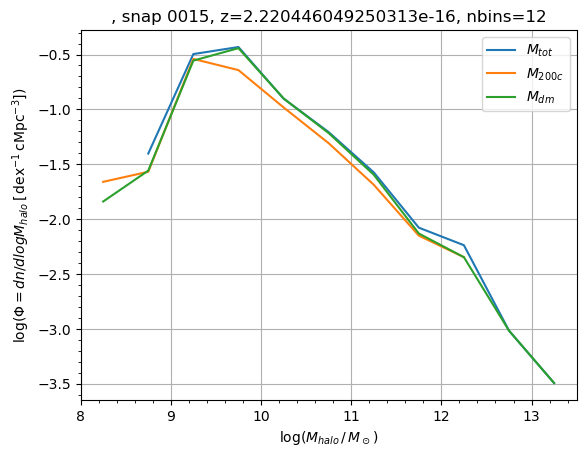

In [24]:
#print(halo_dm_masses.min())
#log_halo_tot_masses = np.log10(halo_tot_masses)
#log_halo_vir_masses = np.log10(halo_vir_masses)
#log_halo_dm_masses = np.log10(halo_dm_masses)
#logM = np.log10(halo_tot_masses)        #Take logarithm
#print(logM.min())
#print(logM.max())
dlogM = 0.5                             #bin width in dex
#bins = np.arange(logM.min(), logM.max(), dlogM)
bins = np.arange(8, 13.5+dlogM, dlogM)
nbins = len(bins)
#nbins = 10                              #Number of bins to divide data into
#Vcom     = 18**3 * h**(-3)              #Physical box volume in Mpc3
Phi_tot, edg_tot = np.histogram(log_halo_tot_masses, bins=bins) #Unnormalized histogram and bin edges
Phi_vir, edg_vir = np.histogram(log_halo_vir_masses, bins=bins)
Phi_dm, edg_dm = np.histogram(log_halo_dm_masses, bins=bins)
#dlogM    = edg[1] - edg[0]                 #Bin size
logM_tot_ax   = edg_tot[0:-1] + dlogM/2.               #Mass axis
logM_vir_ax   = edg_vir[0:-1] + dlogM/2.
logM_dm_ax   = edg_dm[0:-1] + dlogM/2.
#print(logM_ax)
#print(Phi)
Phi_tot   = Phi_tot / Vcom / dlogM                 #Normalize to volume and bin size
Phi_vir   = Phi_vir / Vcom / dlogM
Phi_dm   = Phi_dm / Vcom / dlogM

#fig, ax = plt.subplots()
plt.clf()
#plt.yscale('log')
plt.xlabel(r'$\log(M_{halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(\Phi=dn/dlogM_{halo}\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])$')
plt.title(r'%s, snap %s, z=%s, nbins=%s' % (cali_num, snap_num, z, nbins))
plt.grid()
plt.minorticks_on()
plt.plot(logM_tot_ax, np.log10(Phi_tot), ls='-', label=r'$M_{tot}$')
plt.plot(logM_vir_ax, np.log10(Phi_vir), ls='-', label=r'$M_{200c}$')
plt.plot(logM_dm_ax, np.log10(Phi_dm), ls='-', label=r'$M_{dm}$')
plt.legend()
plt.show()

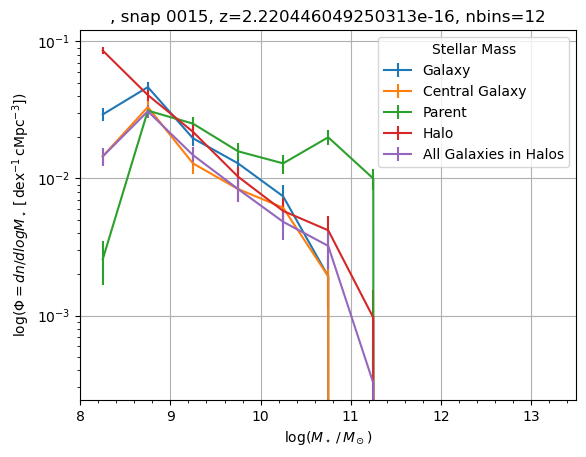

In [47]:
#log_gal_stellar_masses = np.log10(gal_stellar_masses)        #Take logarithm
#print(logM.min())
#print(logM.max())
dlogM = 0.5                             #bin width in dex
#bins = np.arange(logM.min(), logM.max(), dlogM)
bins = np.arange(8, 13.5+dlogM, dlogM)
nbins = len(bins)
#nbins = 10                              #Number of bins to divide data into
#Vcom     = 18**3 * h**(-3)              #Physical box volume in Mpc3

Phi_gal, edg_gal = np.histogram(log_gal_stellar_masses, bins=bins) #Unnormalized histogram and bin edges
Phi_central, edg_central = np.histogram(log_central_gal_stellar_masses, bins=bins)
Phi_parent_halo, edg_parent_halo = np.histogram(log_parent_halo_stellar_masses, bins=bins)
Phi_halo, edg_halo = np.histogram(log_halo_stellar_masses, bins=bins)
Phi_halo_gal, edg_halo_gal = np.histogram(log_halo_gal_stellar_masses, bins=bins)
#dlogM    = edg[1] - edg[0]                 #Bin size

Phi_gal_err = np.sqrt(Phi_gal)
Phi_central_err = np.sqrt(Phi_central)
Phi_parent_halo_err = np.sqrt(Phi_parent_halo)
Phi_halo_err = np.sqrt(Phi_halo)
Phi_halo_gal_err = np.sqrt(Phi_halo_gal)

#print(Phi_gal)
#print(Phi_gal_err)
#print(np.log10(Phi_gal_err))

logM_gal_ax   = edg_gal[0:-1] + dlogM/2.               #Mass axis
logM_central_ax   = edg_central[0:-1] + dlogM/2.
logM_parent_halo_ax   = edg_parent_halo[0:-1] + dlogM/2.
logM_halo_ax   = edg_halo[0:-1] + dlogM/2.
logM_halo_gal_ax   = edg_halo_gal[0:-1] + dlogM/2.
#print(logM_gal_ax)
#print(logM_central_ax)
#print(logM_parent_halo_ax)

Phi_gal = Phi_gal / Vcom / dlogM                 #Normalize to volume and bin size
Phi_central = Phi_central / Vcom / dlogM
Phi_parent_halo = Phi_parent_halo / Vcom / dlogM
Phi_halo = Phi_halo / Vcom / dlogM
Phi_halo_gal = Phi_halo_gal / Vcom / dlogM

Phi_gal_err /= Vcom * dlogM
Phi_central_err /= Vcom * dlogM
Phi_parent_halo_err /= Vcom * dlogM
Phi_halo_err /= Vcom * dlogM
Phi_halo_gal_err /= Vcom * dlogM

#Phi_gal_err = np.sqrt(Phi_gal)
#Phi_central_err = np.sqrt(Phi_central)
#Phi_parent_halo_err = np.sqrt(Phi_parent_halo)
#Phi_halo_err = np.sqrt(Phi_halo)
#Phi_halo_gal_err = np.sqrt(Phi_halo_gal)

#print(Phi_gal)
#print(Phi_gal_err)
#print(np.log10(Phi_gal_err))



#fig, ax = plt.subplots()
plt.clf()
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\log(\Phi=dn/dlogM_\star\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])$')
plt.title(r'%s, snap %s, z=%s, nbins=%s' % (cali_num, snap_num, z, nbins))
#plt.ylabel(r'$\log{(\Phi\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])}$')
#plt.plot(Max,Phi,ls='steps-post')
plt.grid()
plt.minorticks_on()
#plt.tick_params(axis="y",direction="in")#, left="off",labelleft="on")

#plt.plot(logM_gal_ax, np.log10(Phi_gal), ls='-', label='Galaxy')
#plt.plot(logM_central_ax, np.log10(Phi_central), ls='-', label='Central Galaxy')
#plt.plot(logM_parent_halo_ax, np.log10(Phi_parent_halo), ls='-', label='Parent Halo')
#plt.plot(logM_halo_ax, np.log10(Phi_halo), ls='-', label='Halo')
#plt.plot(logM_halo_gal_ax, np.log10(Phi_halo_gal), ls='-', label='All Galaxies in Halos')

#plt.errorbar(logM_gal_ax, np.log10(Phi_gal), yerr=np.abs(np.log10(Phi_gal_err.value)), ls='-', label='Galaxy')
plt.errorbar(logM_gal_ax, Phi_gal.value, yerr=Phi_gal_err.value, ls='-', label='Galaxy')
plt.errorbar(logM_central_ax, Phi_central.value, yerr=Phi_central_err.value, ls='-', label='Central Galaxy')
plt.errorbar(logM_parent_halo_ax, Phi_parent_halo.value, yerr=Phi_parent_halo_err.value, ls='-', label='Parent')
plt.errorbar(logM_halo_ax, Phi_halo.value, yerr=Phi_halo_err.value, ls='-', label='Halo')
plt.errorbar(logM_halo_gal_ax, Phi_halo_gal.value, yerr=Phi_halo_gal_err.value, ls='-', label='All Galaxies in Halos')

plt.legend(title='Stellar Mass')
plt.show()

## Create Stellar Mass-Halo Mass Relation (SMHM)

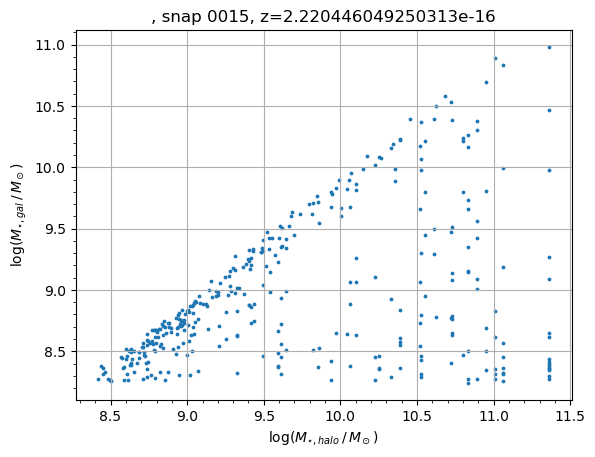

In [75]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{\star,halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{\star,gal}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

#plt.hist2d(log_halo_tot_masses, log_halo_stellar_masses, bins=(300,300), cmap=plt.cm.jet)
#plt.hist2d(halo_vir_masses, halo_stellar_masses, bins=(50,50), cmap=plt.cm.jet)
#plt.colorbar()

plt.scatter(log_parent_halo_stellar_masses, log_gal_stellar_masses, s=3)


# Calculate meian/mean


plt.show()

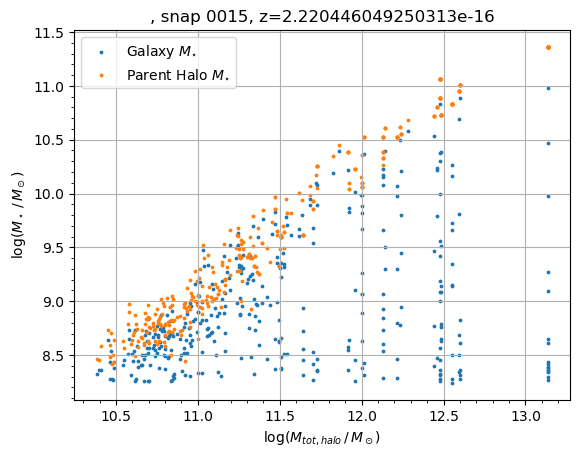

In [76]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{tot,halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_parent_halo_tot_masses, log_gal_stellar_masses, s=3, label=r'Galaxy $M_{\star}$')
plt.scatter(log_parent_halo_tot_masses, log_parent_halo_stellar_masses, s=3, label=r'Parent Halo $M_{\star}$')

plt.legend()
plt.show()

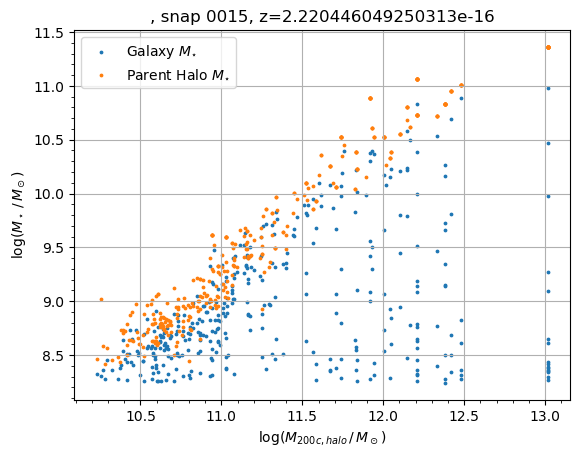

In [77]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{200c,halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_parent_halo_vir_masses, log_gal_stellar_masses, s=3, label=r'Galaxy $M_{\star}$')
plt.scatter(log_parent_halo_vir_masses, log_parent_halo_stellar_masses, s=3, label=r'Parent Halo $M_{\star}$')

plt.legend()
plt.show()

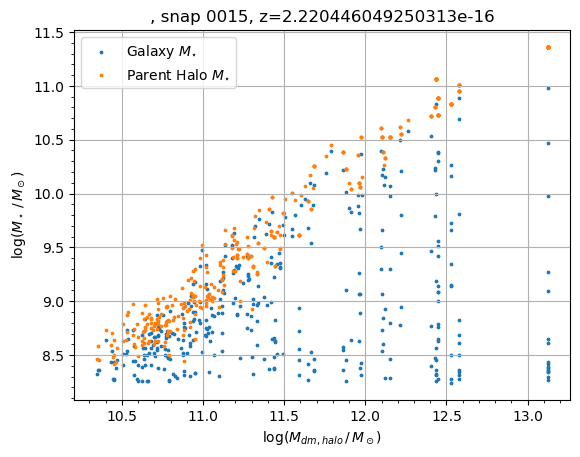

In [78]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{dm,halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_parent_halo_dm_masses, log_gal_stellar_masses, s=3, label=r'Galaxy $M_{\star}$')
plt.scatter(log_parent_halo_dm_masses, log_parent_halo_stellar_masses, s=3, label=r'Parent Halo $M_{\star}$')

plt.legend()
plt.show()

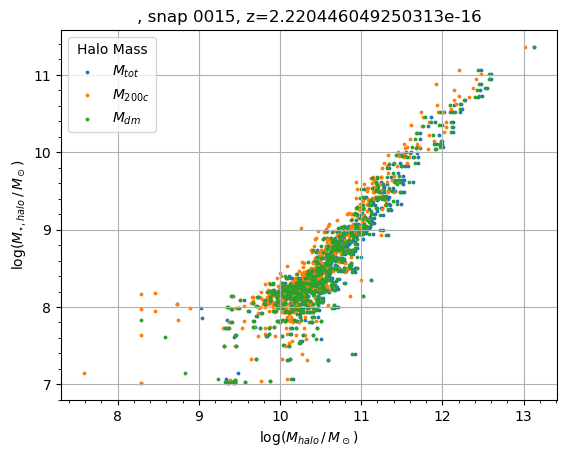

In [79]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{\star,halo}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

#plt.hist2d(log_halo_tot_masses, log_halo_stellar_masses, bins=(300,300), cmap=plt.cm.jet)
#plt.hist2d(halo_vir_masses, halo_stellar_masses, bins=(50,50), cmap=plt.cm.jet)
#plt.colorbar()

plt.scatter(log_halo_tot_masses, log_halo_stellar_masses, s=3, label=r'$M_{tot}$')
plt.scatter(log_halo_vir_masses, log_halo_stellar_masses, s=3, label=r'$M_{200c}$')
plt.scatter(log_halo_dm_masses, log_halo_stellar_masses, s=3, label=r'$M_{dm}$')

plt.legend(title='Halo Mass')
plt.show()

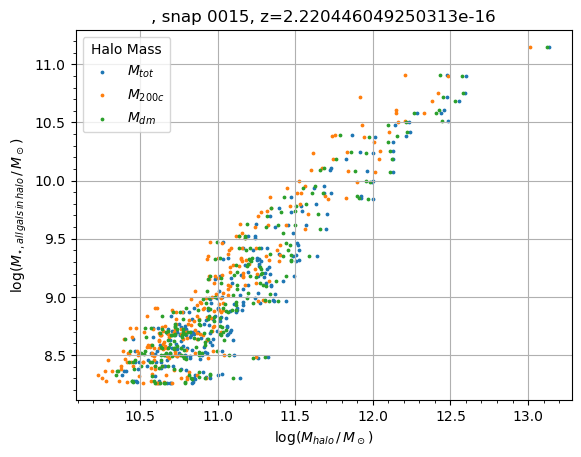

In [80]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{\star,all\, gals\, in\, halo}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

#plt.hist2d(log_halo_tot_masses, log_halo_stellar_masses, bins=(300,300), cmap=plt.cm.jet)
#plt.hist2d(halo_vir_masses, halo_stellar_masses, bins=(50,50), cmap=plt.cm.jet)
#plt.colorbar()

plt.scatter(log_halo_tot_masses, log_halo_gal_stellar_masses, s=3, label=r'$M_{tot}$')
plt.scatter(log_halo_vir_masses, log_halo_gal_stellar_masses, s=3, label=r'$M_{200c}$')
plt.scatter(log_halo_dm_masses, log_halo_gal_stellar_masses, s=3, label=r'$M_{dm}$')

plt.legend(title='Halo Mass')
plt.show()

# Create black hole functions/relations

## Black Hole Mass Function (BHMF)

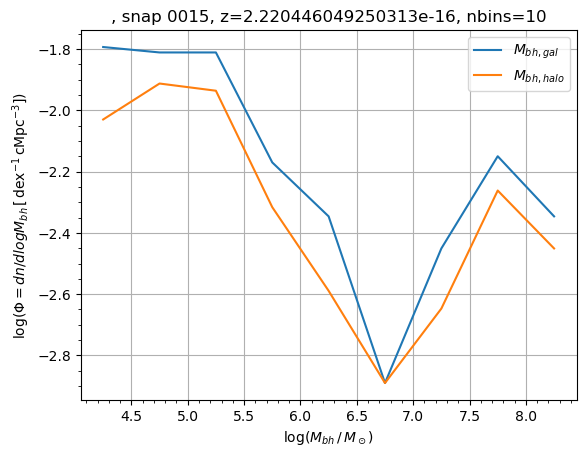

In [81]:
dlogM = 0.5                             #bin width in dex
bins = np.arange(4, 9, dlogM)
nbins = len(bins)

Phi_gal, edg_gal = np.histogram(log_gal_bh_masses, bins=bins) #Unnormalized histogram and bin edges
Phi_halo, edg_halo = np.histogram(log_halo_bh_masses, bins=bins)

logM_gal_ax   = edg_gal[0:-1] + dlogM/2.               #Mass axis
logM_halo_ax   = edg_halo[0:-1] + dlogM/2.

Phi_gal   = Phi_gal / Vcom / dlogM                 #Normalize to volume and bin size
Phi_halo   = Phi_halo / Vcom / dlogM

#fig, ax = plt.subplots()
plt.clf()
#plt.yscale('log')
plt.xlabel(r'$\log(M_{bh}\,/\,M_\odot)$')
plt.ylabel(r'$\log(\Phi=dn/dlogM_{bh}\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])$')
plt.title(r'%s, snap %s, z=%s, nbins=%s' % (cali_num, snap_num, z, nbins))
plt.grid()
plt.minorticks_on()
plt.plot(logM_gal_ax, np.log10(Phi_gal), ls='-', label=r'$M_{bh,gal}$')
plt.plot(logM_halo_ax, np.log10(Phi_halo), ls='-', label=r'$M_{bh,halo}$')
plt.legend()
plt.show()

## Black Hole Mass-Halo Mass Function (BHHMF)

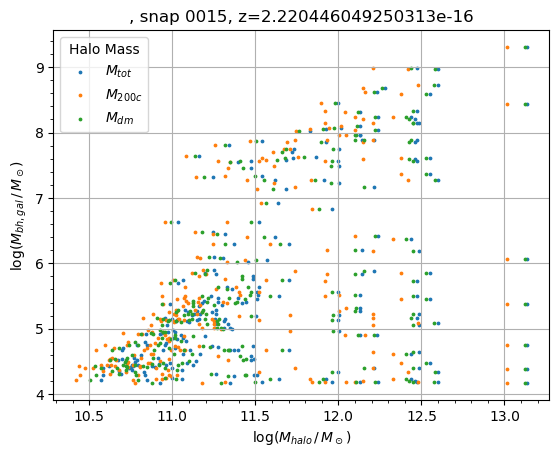

In [82]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{bh,gal}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_parent_halo_tot_masses, log_gal_bh_masses, s=3, label=r'$M_{tot}$')
plt.scatter(log_parent_halo_vir_masses, log_gal_bh_masses, s=3, label=r'$M_{200c}$')
plt.scatter(log_parent_halo_dm_masses, log_gal_bh_masses, s=3, label=r'$M_{dm}$')

plt.legend(title='Halo Mass')
plt.show()

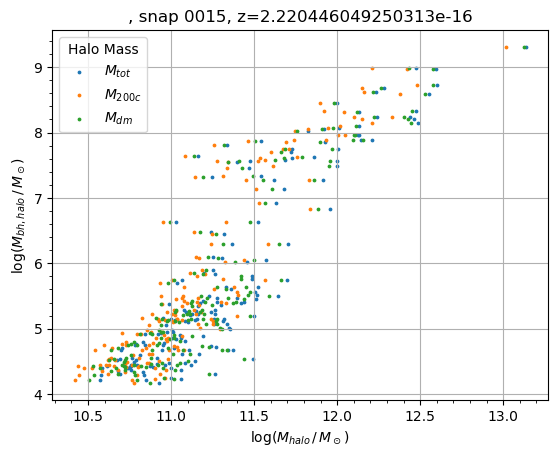

In [83]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{bh,halo}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_halo_tot_masses, log_halo_bh_masses, s=3, label=r'$M_{tot}$')
plt.scatter(log_halo_vir_masses, log_halo_bh_masses, s=3, label=r'$M_{200c}$')
plt.scatter(log_halo_dm_masses, log_halo_bh_masses, s=3, label=r'$M_{dm}$')

plt.legend(title='Halo Mass')
plt.show()

## Black Hole Mass-Stellar Mass Function (BHSMF)

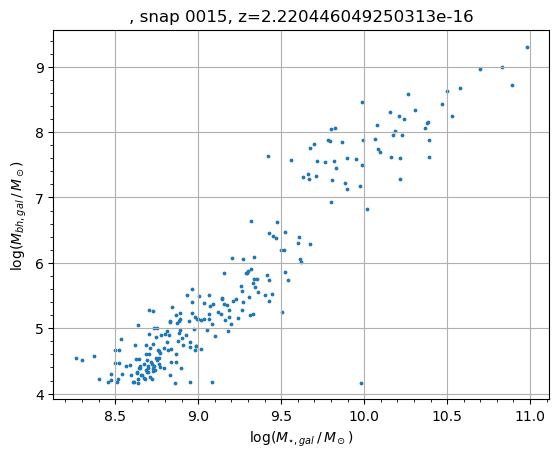

In [84]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{\star,gal}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{bh,gal}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_gal_stellar_masses, log_gal_bh_masses, s=3)#, label=r'$M_{tot}$')
#plt.scatter(log_parent_halo_vir_masses, log_gal_bh_masses, s=3, label=r'$M_{200c}$')
#plt.scatter(log_parent_halo_dm_masses, log_gal_bh_masses, s=3, label=r'$M_{dm}$')

#plt.legend(title='Halo Mass')
plt.show()

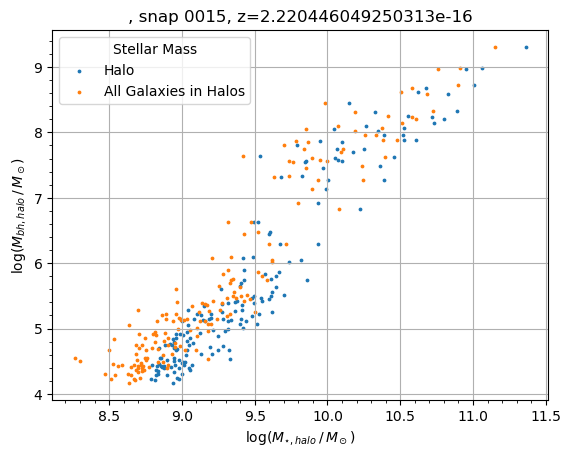

In [85]:
plt.clf()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log(M_{\star,halo}\,/\,M_\odot)$')
plt.ylabel(r'$\log(M_{bh,halo}\,/\,M_\odot)$')
plt.title(r'%s, snap %s, z=%s' % (cali_num, snap_num, z))
plt.grid()
plt.minorticks_on()

plt.scatter(log_halo_stellar_masses, log_halo_bh_masses, s=3, label=r'Halo')
plt.scatter(log_halo_gal_stellar_masses, log_halo_bh_masses, s=3, label=r'All Galaxies in Halos')

plt.legend(title='Stellar Mass')
plt.show()

# Observables over redshift/time

In [86]:
obj.halos[0].central_galaxy.masses

{'H2': unyt_quantity(1.09366654e+08, 'Msun'),
 'H2_30kpc': unyt_quantity(0., 'Msun'),
 'HI': unyt_quantity(3.53858382e+09, 'Msun'),
 'HI_30kpc': unyt_quantity(18335541.52789068, 'Msun'),
 'baryon': unyt_quantity(9.57245029e+10, 'Msun'),
 'bh': unyt_quantity(2.03063002e+09, 'Msun'),
 'bh_30kpc': unyt_quantity(2.03063002e+09, 'Msun'),
 'dm': unyt_quantity(2.03063002e+09, 'Msun'),
 'dm_30kpc': unyt_quantity(4.99344166e+11, 'Msun'),
 'dust': unyt_quantity(0., 'Msun'),
 'gas': unyt_quantity(0., 'Msun'),
 'gas_30kpc': unyt_quantity(7.73903848e+08, 'Msun'),
 'star_30kpc': unyt_quantity(1.01651007e+11, 'Msun'),
 'stellar': unyt_quantity(9.5678079e+10, 'Msun'),
 'total': unyt_quantity(9.77087119e+10, 'Msun')}

In [33]:
redshifts = []
log_sfrd = {'gal_inst':[], 'gal_100':[], 'halo_inst':[], 'halo_100':[]}  # Msun/yr/Mpc^3
log_mean_ssfr = {'gal_inst':[], 'gal_100':[], 'halo_inst':[], 'halo_100':[]}  # Gyr^-1
log_smd = {'gal':[], 'halo':[]}  # Msun/Mpc^3

halo_mass_function = {}
stellar_mass_function = {}
sfr_function = {}

log_gal_masses = {'stellar':{}, 'central_stellar':{}, 'parent_halo_stellar':{}, 'parent_halo_tot':{},
                 'parent_halo_vir':{}, 'parent_halo_dm':{}, 'bh':{}}
log_halo_masses = {'stellar':{}, 'central_stellar':{}, 'gal_stellar':{}, 'tot':{}, 'vir':{}, 'dm':{}, 'bh':{}}
log_sfr = {'gal_inst':{}, 'gal_100':{}, 'halo_inst':{}, 'halo_100':{}}  # Msun/yr
log_ssfr = {'gal_inst':{}, 'gal_100':{}, 'halo_inst':{}, 'halo_100':{}}  # Gyr^-1

num_snaps = 16
#cali_list = ["cali_%s" % str(i).zfill(4) for i in range(num_calis)]
snap_num_list = ["%04d" % i for i in range(num_snaps)]
print(snap_num_list)

for snapnum in snap_num_list:
    # Load snapshot into yt
    snap_ = os.path.join(snap_dir, cali_num, snap_prefix+'_'+snapnum+'.hdf5')
    ds_ = load(snap_)
    
    Vcom_ = ds_.domain_width.in_units("Mpccm").prod()
    print("Comoving Volume=%s" % Vcom_)
    
    # Load in Caesar file
    infile_ = os.path.join(snap_dir, cali_num, snap_prefix+'_caesar_'+snapnum+'.hdf5')
    obj_ = caesar.load(infile_)
    
    z_ = obj_.simulation.redshift
    h_ = obj_.simulation.hubble_constant

    print('z=%s' % (z_))
    print('h=%s' % (h_))
    
    redshifts.append(z_)
    
    # Calculate galaxy/halo properties
    log_sfrd['gal_inst'].append(np.log10(sum([gal.sfr for gal in obj_.galaxies])/Vcom_))
    log_sfrd['gal_100'].append(np.log10(sum([gal.sfr_100 for gal in obj_.galaxies])/Vcom_))
    log_sfrd['halo_inst'].append(np.log10(sum([halo.sfr for halo in obj_.halos])/Vcom_))
    log_sfrd['halo_100'].append(np.log10(sum([halo.sfr_100 for halo in obj_.halos])/Vcom_))
    
    log_mean_ssfr['gal_inst'].append(np.log10(np.mean([gal.sfr/gal.masses['stellar'] for gal in obj_.galaxies])*1e9))
    log_mean_ssfr['gal_100'].append(np.log10(np.mean([gal.sfr_100/gal.masses['stellar'] for gal in obj_.galaxies])*1e9))
    log_mean_ssfr['halo_inst'].append(np.log10(np.mean([halo.sfr/halo.masses['stellar'] for halo in obj_.halos])*1e9))
    log_mean_ssfr['halo_100'].append(np.log10(np.mean([halo.sfr_100/halo.masses['stellar'] for halo in obj_.halos])*1e9))
    
    log_smd['gal'].append(np.log10(sum([gal.masses['stellar'] for gal in obj_.galaxies])/Vcom_))
    log_smd['halo'].append(np.log10(sum([halo.masses['stellar'] for halo in obj_.halos])/Vcom_))
    
    
    log_gal_masses['stellar'][str(z_)] = np.log10(np.array([gal.masses['stellar'] for gal in obj_.galaxies]))
    log_gal_masses['central_stellar'][str(z_)] = np.log10(np.array([gal.masses['stellar'] for gal in obj_.galaxies if gal.central]))
    log_gal_masses['parent_halo_stellar'][str(z_)] = np.log10(np.array([gal.halo.masses['stellar'] for gal in obj_.galaxies]))
    log_gal_masses['parent_halo_tot'][str(z_)] = np.log10(np.array([gal.halo.masses['total'] for gal in obj_.galaxies]))
    log_gal_masses['parent_halo_vir'][str(z_)] = np.log10(np.array([gal.halo.virial_quantities['m200c'] for gal in obj_.galaxies]))
    log_gal_masses['parent_halo_dm'][str(z_)] = np.log10(np.array([gal.halo.masses['dm'] for gal in obj_.galaxies]))
    log_gal_masses['bh'][str(z_)] = np.log10(np.array([gal.masses['bh'] for gal in obj_.galaxies]))
    
    log_halo_masses['stellar'][str(z_)] = np.log10(np.array([halo.masses['stellar'] for halo in obj_.halos]))
    log_halo_masses['central_stellar'][str(z_)] = np.log10(np.array([halo.central_galaxy.masses['stellar'] for halo in obj_.halos if halo.central_galaxy is not None]))
    log_halo_masses['gal_stellar'][str(z_)] = np.log10(np.array([sum(gal.masses['stellar'] for gal in halo.galaxies) for halo in obj_.halos]))
    log_halo_masses['tot'][str(z_)] = np.log10(np.array([halo.masses['total'] for halo in obj_.halos]))
    log_halo_masses['vir'][str(z_)] = np.log10(np.array([halo.virial_quantities['m200c'] for halo in obj_.halos]))
    log_halo_masses['dm'][str(z_)] = np.log10(np.array([halo.masses['dm'] for halo in obj_.halos]))
    log_halo_masses['bh'][str(z_)] = np.log10(np.array([halo.masses['bh'] for halo in obj_.halos]))
    
    log_sfr['gal_inst'][str(z_)] = np.log10(np.array([gal.sfr for gal in obj_.galaxies]))
    log_sfr['gal_100'][str(z_)] = np.log10(np.array([gal.sfr_100 for gal in obj_.galaxies]))
    log_sfr['halo_inst'][str(z_)] = np.log10(np.array([halo.sfr for halo in obj_.halos]))
    log_sfr['halo_100'][str(z_)] = np.log10(np.array([halo.sfr_100 for halo in obj_.halos]))
    
    log_ssfr['gal_inst'][str(z_)] = np.log10(np.array([gal.sfr.to('Msun/Gyr')/gal.masses['stellar'] for gal in obj_.galaxies]))
    log_ssfr['gal_100'][str(z_)] = np.log10(np.array([gal.sfr_100.to('Msun/Gyr')/gal.masses['stellar'] for gal in obj_.galaxies]))
    log_ssfr['halo_inst'][str(z_)] = np.log10(np.array([halo.sfr.to('Msun/Gyr')/halo.masses['stellar'] for halo in obj_.halos]))
    log_ssfr['halo_100'][str(z_)] = np.log10(np.array([halo.sfr_100.to('Msun/Gyr')/halo.masses['stellar'] for halo in obj_.halos]))
    
    
    halo_vir_masses_ = np.array([halo.virial_quantities['m200c'] for halo in obj_.halos])
    log_halo_vir_masses_ = np.log10(halo_vir_masses_)
    dlogM_ = 0.5
    bins_ = np.arange(5, 15+dlogM_, dlogM_)
    Phi_, edg_ = np.histogram(log_halo_vir_masses_, bins=bins_)
    logM_ax_   = edg_[0:-1] + dlogM_/2.
    log_Phi_ = np.log10(Phi_ / Vcom_ / dlogM_)
    halo_mass_function[str(z_)] = {'x':None, 'y':None}
    halo_mass_function[str(z_)]['x'] = logM_ax_
    halo_mass_function[str(z_)]['y'] = log_Phi_
    
    gal_stellar_masses_ = np.array([gal.masses['stellar'] for gal in obj_.galaxies])
    log_gal_stellar_masses_ = np.log10(gal_stellar_masses_)
    dlogM_ = 0.5
    bins_ = np.arange(5, 15+dlogM_, dlogM_)
    Phi_, edg_ = np.histogram(log_gal_stellar_masses_, bins=bins_)
    logM_ax_   = edg_[0:-1] + dlogM_/2.
    log_Phi_ = np.log10(Phi_ / Vcom_ / dlogM_)
    stellar_mass_function[str(z_)] = {'x':None, 'y':None}
    stellar_mass_function[str(z_)]['x'] = logM_ax_
    stellar_mass_function[str(z_)]['y'] = log_Phi_
    
    gal_sfrs_ = np.array([gal.sfr for gal in obj_.galaxies])
    log_gal_sfrs_ = np.log10(gal_sfrs_)
    dlogSFR_ = 0.5
    bins_ = np.arange(-5, 5+dlogSFR_, dlogSFR_)
    Phi_, edg_ = np.histogram(log_gal_sfrs_, bins=bins_)
    logSFR_ax_   = edg_[0:-1] + dlogSFR_/2.
    log_Phi_ = np.log10(Phi_ / Vcom_ / dlogSFR_)
    sfr_function[str(z_)] = {'x':None, 'y':None}
    sfr_function[str(z_)]['x'] = logSFR_ax_
    sfr_function[str(z_)]['y'] = log_Phi_

yt : [INFO     ] 2023-06-09 11:57:54,665 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:54,675 Calculating time from 7.905e-04 to be 2.439e+16 seconds
yt : [INFO     ] 2023-06-09 11:57:54,694 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:54,749 Parameters: current_time              = 2.4390790334822388e+16 s
yt : [INFO     ] 2023-06-09 11:57:54,751 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:54,753 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:57:54,754 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:57:54,755 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:57:54,756 Parameters: current_redshift          = 7.000000000000002
yt : [INFO     ] 2023-06-09 11:57:54,756 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:57:54,757 Parameters: omega_matter              = 0.3

['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015']
Comoving Volume=6211.597414298313 Mpccm**3


/tmp/ipykernel_77226/3151342777.py:62: RuntimeWarning: divide by zero encountered in log10
  log_gal_masses['bh'][str(z_)] = np.log10(np.array([gal.masses['bh'] for gal in obj_.galaxies]))
/tmp/ipykernel_77226/3151342777.py:64: RuntimeWarning: divide by zero encountered in log10
  log_halo_masses['stellar'][str(z_)] = np.log10(np.array([halo.masses['stellar'] for halo in obj_.halos]))
/tmp/ipykernel_77226/3151342777.py:66: RuntimeWarning: divide by zero encountered in log10
  log_halo_masses['gal_stellar'][str(z_)] = np.log10(np.array([sum(gal.masses['stellar'] for gal in halo.galaxies) for halo in obj_.halos]))
/tmp/ipykernel_77226/3151342777.py:68: RuntimeWarning: divide by zero encountered in log10
  log_halo_masses['vir'][str(z_)] = np.log10(np.array([halo.virial_quantities['m200c'] for halo in obj_.halos]))
/tmp/ipykernel_77226/3151342777.py:70: RuntimeWarning: divide by zero encountered in log10
  log_halo_masses['bh'][str(z_)] = np.log10(np.array([halo.masses['bh'] for halo in o

z=7.000000000000002
h=0.68


/tmp/ipykernel_77226/3151342777.py:79: RuntimeWarning: divide by zero encountered in log10
  log_ssfr['halo_inst'][str(z_)] = np.log10(np.array([halo.sfr.to('Msun/Gyr')/halo.masses['stellar'] for halo in obj_.halos]))
/tmp/ipykernel_77226/3151342777.py:80: RuntimeWarning: divide by zero encountered in log10
  log_ssfr['halo_100'][str(z_)] = np.log10(np.array([halo.sfr_100.to('Msun/Gyr')/halo.masses['stellar'] for halo in obj_.halos]))
/tmp/ipykernel_77226/3151342777.py:84: RuntimeWarning: divide by zero encountered in log10
  log_halo_vir_masses_ = np.log10(halo_vir_masses_)
yt : [INFO     ] 2023-06-09 11:57:55,148 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:55,156 Calculating time from 9.654e-04 to be 2.979e+16 seconds
yt : [INFO     ] 2023-06-09 11:57:55,176 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:55,230 Parameters: current_time              = 2.978868272828722e+16 s
yt : [INFO     ] 2023-06-09 11:57:55,232 Parameters: domain_dimensions

Comoving Volume=6211.597414298313 Mpccm**3
z=6.000007000006998
h=0.68


yt : [INFO     ] 2023-06-09 11:57:55,694 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:55,703 Calculating time from 1.216e-03 to be 3.751e+16 seconds
yt : [INFO     ] 2023-06-09 11:57:55,722 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:55,777 Parameters: current_time              = 3.7513344694624056e+16 s
yt : [INFO     ] 2023-06-09 11:57:55,779 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:55,780 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:57:55,781 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:57:55,782 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:57:55,782 Parameters: current_redshift          = 4.9999880000240005
yt : [INFO     ] 2023-06-09 11:57:55,783 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:57:55,783 Parameters: omega_matter              = 0.

Comoving Volume=6211.597414298313 Mpccm**3
z=4.9999880000240005
h=0.68


yt : [INFO     ] 2023-06-09 11:57:56,335 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:56,344 Calculating time from 1.596e-03 to be 4.925e+16 seconds
yt : [INFO     ] 2023-06-09 11:57:56,363 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:56,418 Parameters: current_time              = 4.924852382533563e+16 s
yt : [INFO     ] 2023-06-09 11:57:56,420 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:56,422 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:57:56,423 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:57:56,424 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:57:56,425 Parameters: current_redshift          = 4.0
yt : [INFO     ] 2023-06-09 11:57:56,425 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:57:56,426 Parameters: omega_matter              = 0.3
yt : [INFO    

Comoving Volume=6211.597414298309 Mpccm**3
z=4.0
h=0.68


/tmp/ipykernel_77226/3151342777.py:69: RuntimeWarning: divide by zero encountered in log10
  log_halo_masses['dm'][str(z_)] = np.log10(np.array([halo.masses['dm'] for halo in obj_.halos]))
yt : [INFO     ] 2023-06-09 11:57:57,032 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:57,041 Calculating time from 2.224e-03 to be 6.863e+16 seconds
yt : [INFO     ] 2023-06-09 11:57:57,060 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:57,121 Parameters: current_time              = 6.8627136616690664e+16 s
yt : [INFO     ] 2023-06-09 11:57:57,123 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:57,125 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:57:57,127 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:57:57,127 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:57:57,128 Parameters: current_redshift          

Comoving Volume=6211.597414298313 Mpccm**3
z=3.0
h=0.68


/tmp/ipykernel_77226/3151342777.py:73: RuntimeWarning: divide by zero encountered in log10
  log_sfr['gal_100'][str(z_)] = np.log10(np.array([gal.sfr_100 for gal in obj_.galaxies]))
/tmp/ipykernel_77226/3151342777.py:78: RuntimeWarning: divide by zero encountered in log10
  log_ssfr['gal_100'][str(z_)] = np.log10(np.array([gal.sfr_100.to('Msun/Gyr')/gal.masses['stellar'] for gal in obj_.galaxies]))
yt : [INFO     ] 2023-06-09 11:57:57,770 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:57,779 Calculating time from 3.397e-03 to be 1.048e+17 seconds
yt : [INFO     ] 2023-06-09 11:57:57,798 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:57,852 Parameters: current_time              = 1.0481941251085477e+17 s
yt : [INFO     ] 2023-06-09 11:57:57,854 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:57,855 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:57:57,857 Parameters: domain_right_ed

Comoving Volume=6211.597414298317 Mpccm**3
z=2.000003000003
h=0.68


/tmp/ipykernel_77226/3151342777.py:72: RuntimeWarning: divide by zero encountered in log10
  log_sfr['gal_inst'][str(z_)] = np.log10(np.array([gal.sfr for gal in obj_.galaxies]))
/tmp/ipykernel_77226/3151342777.py:77: RuntimeWarning: divide by zero encountered in log10
  log_ssfr['gal_inst'][str(z_)] = np.log10(np.array([gal.sfr.to('Msun/Gyr')/gal.masses['stellar'] for gal in obj_.galaxies]))
/tmp/ipykernel_77226/3151342777.py:106: RuntimeWarning: divide by zero encountered in log10
  log_gal_sfrs_ = np.log10(gal_sfrs_)
yt : [INFO     ] 2023-06-09 11:57:58,523 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:58,532 Calculating time from 6.055e-03 to be 1.868e+17 seconds
yt : [INFO     ] 2023-06-09 11:57:58,551 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:58,605 Parameters: current_time              = 1.8684685625371686e+17 s
yt : [INFO     ] 2023-06-09 11:57:58,606 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:58

Comoving Volume=6211.597414298306 Mpccm**3
z=1.0000000000000009
h=0.68


yt : [INFO     ] 2023-06-09 11:57:59,249 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:57:59,258 Calculating time from 6.990e-03 to be 2.157e+17 seconds
yt : [INFO     ] 2023-06-09 11:57:59,287 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:57:59,343 Parameters: current_time              = 2.1568737595469437e+17 s
yt : [INFO     ] 2023-06-09 11:57:59,345 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:57:59,346 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:57:59,347 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:57:59,348 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:57:59,349 Parameters: current_redshift          = 0.7999985600011521
yt : [INFO     ] 2023-06-09 11:57:59,349 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:57:59,350 Parameters: omega_matter              = 0.

Comoving Volume=6211.597414298313 Mpccm**3
z=0.7999985600011521
h=0.68


yt : [INFO     ] 2023-06-09 11:58:01,113 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:01,122 Calculating time from 7.543e-03 to be 2.328e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:01,140 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:01,195 Parameters: current_time              = 2.3276807586249974e+17 s
yt : [INFO     ] 2023-06-09 11:58:01,196 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:01,198 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:01,199 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:01,200 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:01,201 Parameters: current_redshift          = 0.7000008500004251
yt : [INFO     ] 2023-06-09 11:58:01,201 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:01,202 Parameters: omega_matter              = 0.

Comoving Volume=6211.597414298313 Mpccm**3
z=0.7000008500004251
h=0.68


yt : [INFO     ] 2023-06-09 11:58:01,836 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:01,845 Calculating time from 8.167e-03 to be 2.520e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:01,864 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:01,917 Parameters: current_time              = 2.520017502630287e+17 s
yt : [INFO     ] 2023-06-09 11:58:01,919 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:01,920 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:01,922 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:01,922 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:01,923 Parameters: current_redshift          = 0.6000000000000005
yt : [INFO     ] 2023-06-09 11:58:01,924 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:01,924 Parameters: omega_matter              = 0.3

Comoving Volume=6211.597414298313 Mpccm**3
z=0.6000000000000005
h=0.68


yt : [INFO     ] 2023-06-09 11:58:02,550 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:02,559 Calculating time from 8.871e-03 to be 2.737e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:02,577 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:02,631 Parameters: current_time              = 2.737367509199306e+17 s
yt : [INFO     ] 2023-06-09 11:58:02,633 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:02,634 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:02,636 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:02,636 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:02,637 Parameters: current_redshift          = 0.49999925000037515
yt : [INFO     ] 2023-06-09 11:58:02,638 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:02,638 Parameters: omega_matter              = 0.

Comoving Volume=6211.597414298313 Mpccm**3
z=0.49999925000037515
h=0.68


yt : [INFO     ] 2023-06-09 11:58:03,248 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:03,257 Calculating time from 9.670e-03 to be 2.984e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:03,276 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:03,330 Parameters: current_time              = 2.9838586100830125e+17 s
yt : [INFO     ] 2023-06-09 11:58:03,332 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:03,333 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:03,335 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:03,335 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:03,336 Parameters: current_redshift          = 0.399999440000224
yt : [INFO     ] 2023-06-09 11:58:03,337 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:03,337 Parameters: omega_matter              = 0.3

Comoving Volume=6211.597414298309 Mpccm**3
z=0.399999440000224
h=0.68


yt : [INFO     ] 2023-06-09 11:58:03,948 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:03,957 Calculating time from 1.058e-02 to be 3.264e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:03,976 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:04,031 Parameters: current_time              = 3.264393199116678e+17 s
yt : [INFO     ] 2023-06-09 11:58:04,032 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:04,034 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:04,035 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:04,036 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:04,036 Parameters: current_redshift          = 0.299999610000117
yt : [INFO     ] 2023-06-09 11:58:04,037 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:04,037 Parameters: omega_matter              = 0.3


Comoving Volume=6211.597414298313 Mpccm**3
z=0.299999610000117
h=0.68


yt : [INFO     ] 2023-06-09 11:58:04,643 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:04,653 Calculating time from 1.162e-02 to be 3.585e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:04,672 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:04,726 Parameters: current_time              = 3.584807681568498e+17 s
yt : [INFO     ] 2023-06-09 11:58:04,727 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:04,729 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:04,730 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:04,731 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:04,732 Parameters: current_redshift          = 0.20000048000019177
yt : [INFO     ] 2023-06-09 11:58:04,732 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:04,733 Parameters: omega_matter              = 0.

Comoving Volume=6211.597414298309 Mpccm**3
z=0.20000048000019177
h=0.68


yt : [INFO     ] 2023-06-09 11:58:05,322 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:05,331 Calculating time from 1.281e-02 to be 3.952e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:05,351 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:05,405 Parameters: current_time              = 3.952120329297942e+17 s
yt : [INFO     ] 2023-06-09 11:58:05,406 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:05,408 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:05,409 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:05,409 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:05,410 Parameters: current_redshift          = 0.0999998900000112
yt : [INFO     ] 2023-06-09 11:58:05,410 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:05,411 Parameters: omega_matter              = 0.3

Comoving Volume=6211.597414298313 Mpccm**3
z=0.0999998900000112
h=0.68


yt : [INFO     ] 2023-06-09 11:58:05,992 SwiftDataset!
yt : [INFO     ] 2023-06-09 11:58:06,002 Calculating time from 1.418e-02 to be 4.375e+17 seconds
yt : [INFO     ] 2023-06-09 11:58:06,021 Assuming length units are in comoving centimetres
yt : [INFO     ] 2023-06-09 11:58:06,076 Parameters: current_time              = 4.37485659429611e+17 s
yt : [INFO     ] 2023-06-09 11:58:06,077 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-09 11:58:06,079 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 11:58:06,080 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-06-09 11:58:06,081 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 11:58:06,082 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2023-06-09 11:58:06,082 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-06-09 11:58:06,083 Parameters: omega_matter              = 0

Comoving Volume=6211.597414298313 Mpccm**3
z=2.220446049250313e-16
h=0.68


In [88]:
log_mean_ssfr['halo_inst']

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## Cosmic Star Formation Rate Density (SFRD)

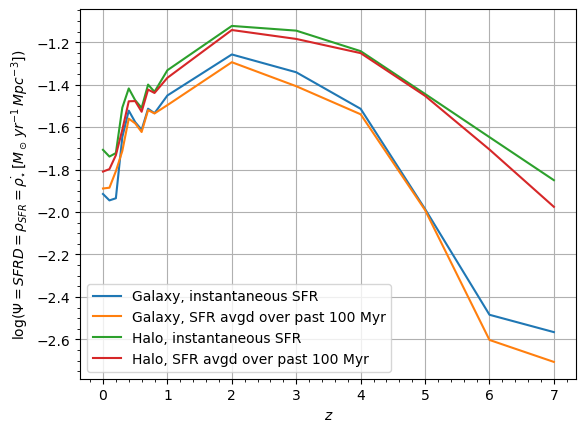

In [92]:
#fig, ax = plt.subplots()
plt.clf()
#plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log(\Psi=SFRD=\rho_{SFR}=\dot{\rho_{\star}}\, [M_\odot\, yr^{-1}\, Mpc^{-3}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()
plt.plot((redshifts), log_sfrd['gal_inst'], ls='-', label=r'Galaxy, instantaneous SFR')
plt.plot((redshifts), log_sfrd['gal_100'], ls='-', label=r'Galaxy, SFR avgd over past 100 Myr')
plt.plot((redshifts), log_sfrd['halo_inst'], ls='-', label=r'Halo, instantaneous SFR')
plt.plot((redshifts), log_sfrd['halo_100'], ls='-', label=r'Halo, SFR avgd over past 100 Myr')
plt.legend()
plt.show()

## Mean Cosmic Specific Star Formation Rate (sSFR = SFR/Mstar)

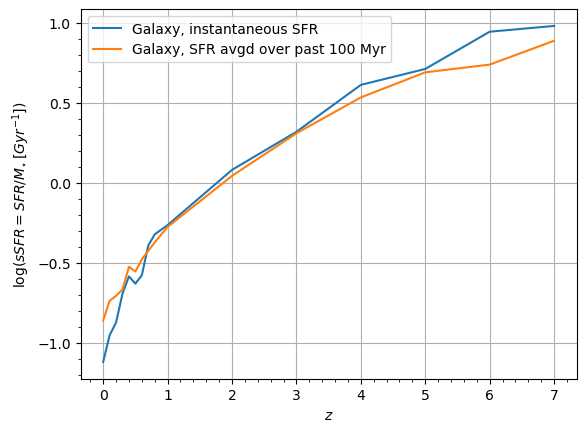

In [93]:
#fig, ax = plt.subplots()
plt.clf()
#plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log(sSFR=SFR/M_{\star}\, [Gyr^{-1}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()
plt.plot((redshifts), log_mean_ssfr['gal_inst'], ls='-', label=r'Galaxy, instantaneous SFR')
plt.plot((redshifts), log_mean_ssfr['gal_100'], ls='-', label=r'Galaxy, SFR avgd over past 100 Myr')
#plt.plot((redshifts), log_mean_ssfr['halo_inst'], ls='-', label=r'Halo, instantaneous SFR')
#plt.plot((redshifts), log_mean_ssfr['halo_100'], ls='-', label=r'Halo, SFR avgd over past 100 Myr')
plt.legend()
plt.show()

## Cosmic Stellar Mass Density (SMD)

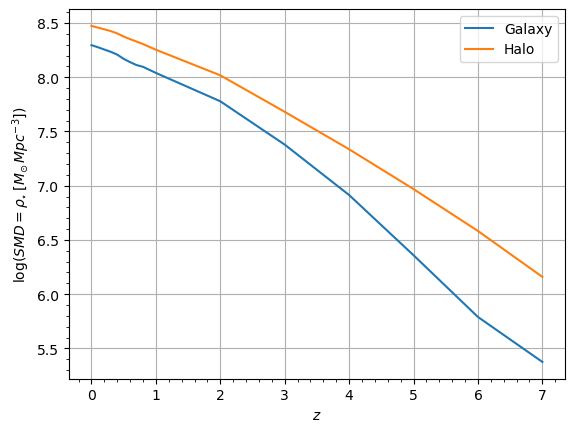

In [94]:
#fig, ax = plt.subplots()
plt.clf()
#plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log(SMD=\rho_{\star}\, [M_{\odot}\, Mpc^{-3}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()
plt.plot((redshifts), log_smd['gal'], ls='-', label=r'Galaxy')
plt.plot((redshifts), log_smd['halo'], ls='-', label=r'Halo')
plt.legend()
plt.show()

## Halo Mass Function (HMF) evolution

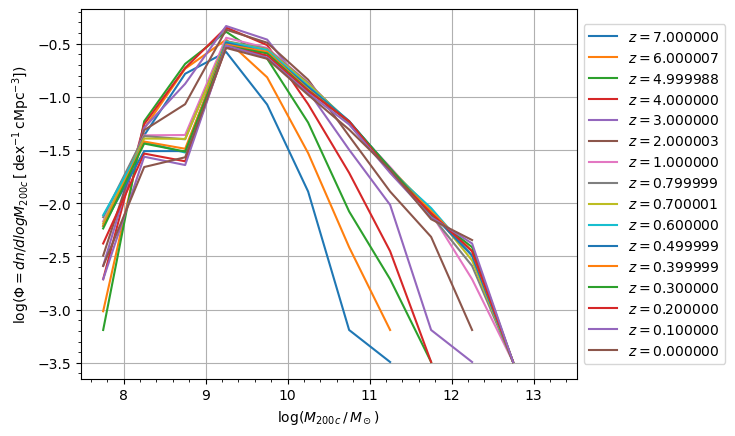

In [95]:
plt.clf()
#plt.yscale('log')
plt.xlabel(r'$\log(M_{200c}\,/\,M_\odot)$')
plt.ylabel(r'$\log(\Phi=dn/dlogM_{200c}\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()

for redshift in redshifts:
    plt.plot(halo_mass_function[str(redshift)]['x'], halo_mass_function[str(redshift)]['y'], ls='-',
             label=r'$z=%1f$' % redshift)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Galaxy Stellar Mass Function (GSMF) evolution

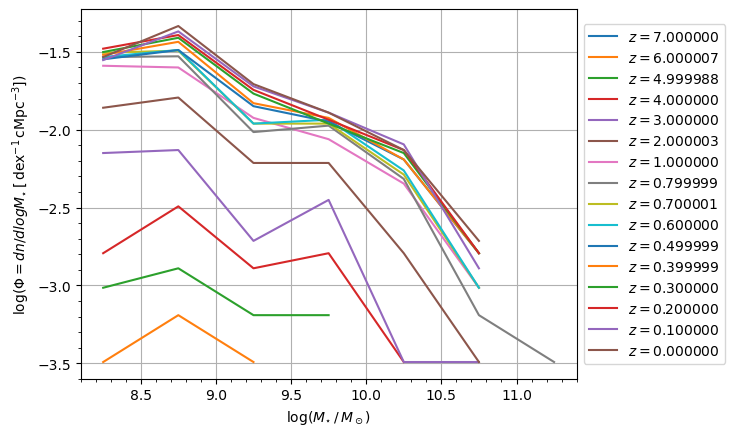

In [96]:
plt.clf()
#plt.yscale('log')
plt.xlabel(r'$\log(M_{\star}\,/\,M_\odot)$')
plt.ylabel(r'$\log(\Phi=dn/dlogM_{\star}\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()

for redshift in redshifts:
    plt.plot(stellar_mass_function[str(redshift)]['x'], stellar_mass_function[str(redshift)]['y'], ls='-', 
             label=r'$z=%f$' % redshift)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Galaxy Star Formation Rate Function (SFRF) evolution

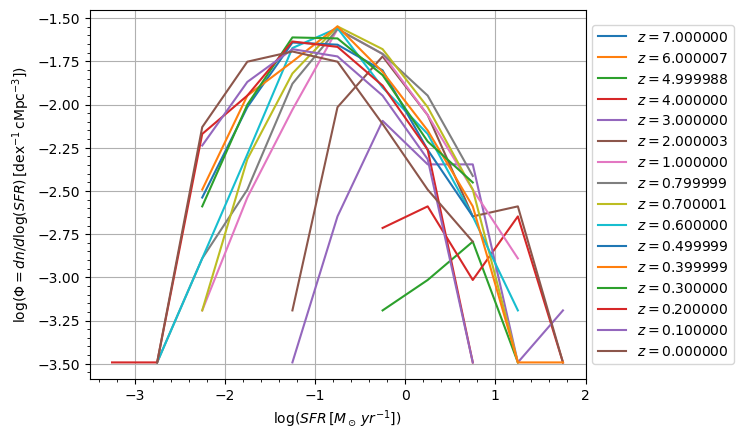

In [97]:
plt.clf()
#plt.yscale('log')
plt.xlabel(r'$\log(SFR\,[M_\odot\, yr^{-1}])$')
plt.ylabel(r'$\log(\Phi=dn/d\log(SFR)\,[\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()

for redshift in redshifts:
    plt.plot(sfr_function[str(redshift)]['x'], sfr_function[str(redshift)]['y'], ls='-', 
             label=r'$z=%f$' % redshift)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Stellar mass-BH mass relation (SMBHM)

In [ ]:
plt.clf()

for redshift in redshifts:

## Quenched Fractions (histogram of sSFR in bins of stellar mass)

In [98]:
log_ssfr['gal_inst'].keys()

dict_keys(['7.000000000000002', '6.000007000006998', '4.9999880000240005', '4.0', '3.0', '2.000003000003', '1.0000000000000009', '0.7999985600011521', '0.7000008500004251', '0.6000000000000005', '0.49999925000037515', '0.399999440000224', '0.299999610000117', '0.20000048000019177', '0.0999998900000112', '2.220446049250313e-16'])

/tmp/ipykernel_77226/2467879974.py:69: RuntimeWarning: invalid value encountered in divide
  frac_mid_plotting = counts_mid_plotting/len(log_ssfr_mid_mass_bin)
/tmp/ipykernel_77226/2467879974.py:70: RuntimeWarning: invalid value encountered in divide
  frac_high_plotting = counts_high_plotting/len(log_ssfr_high_mass_bin)


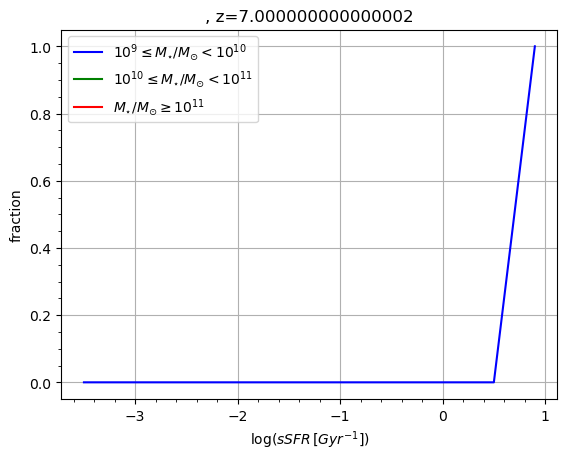

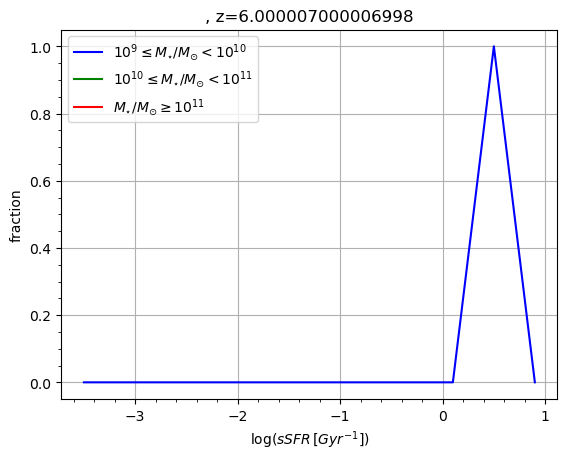

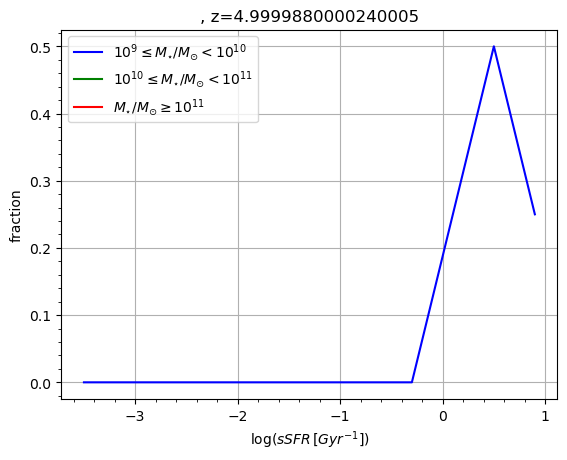

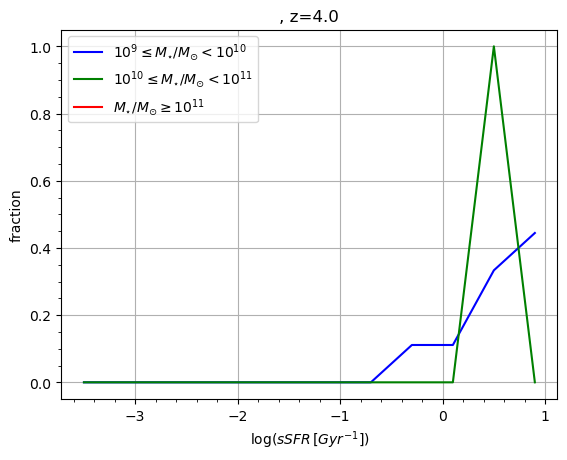

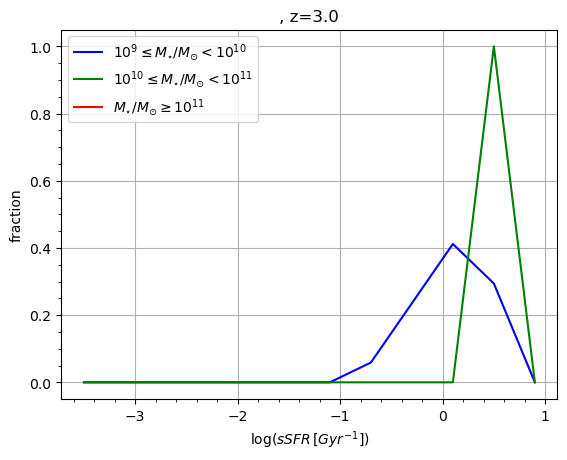

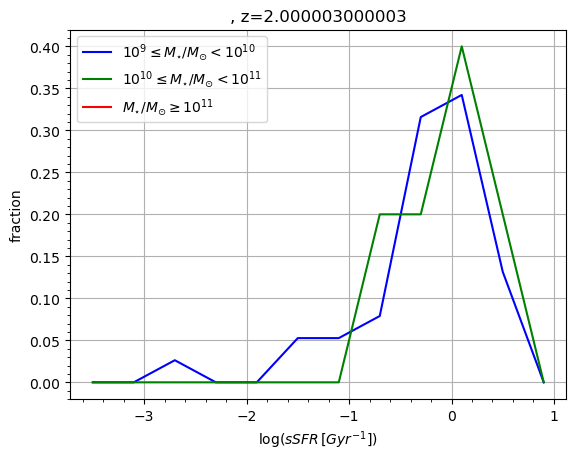

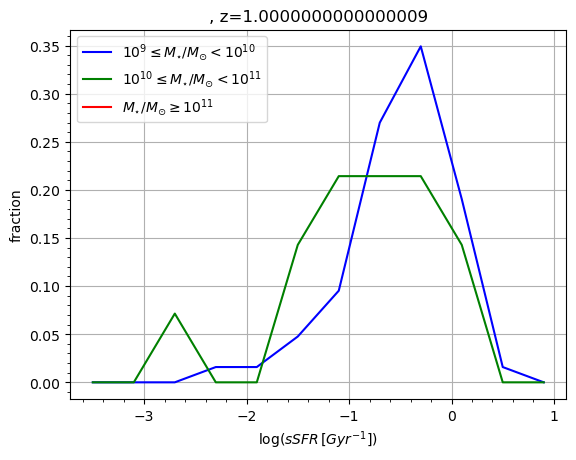

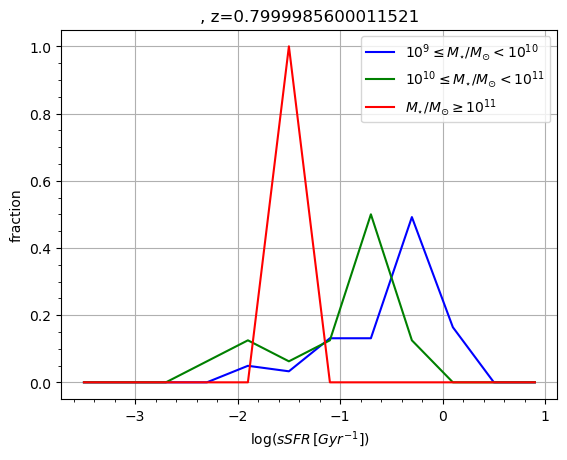

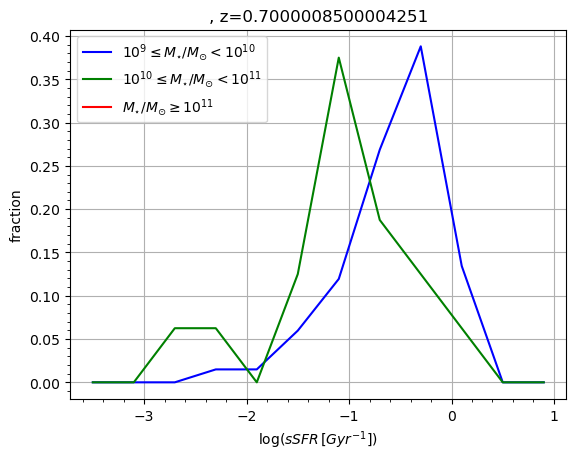

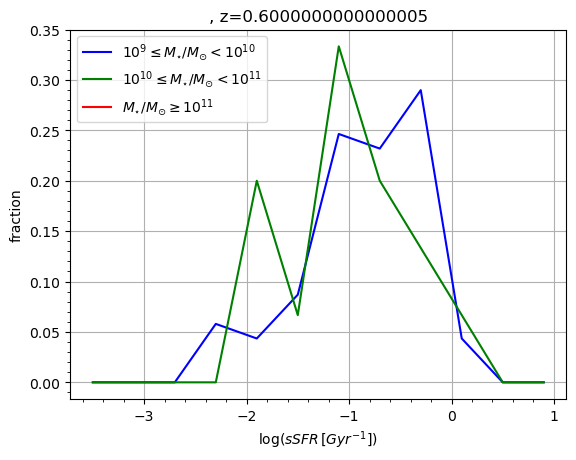

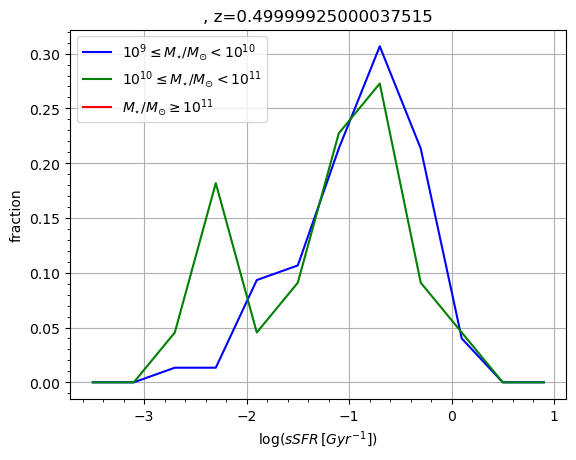

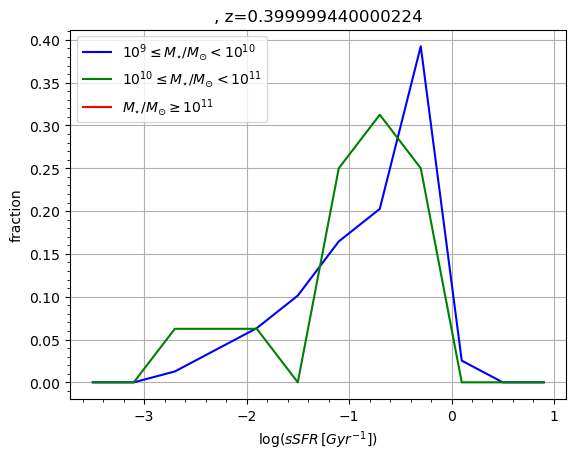

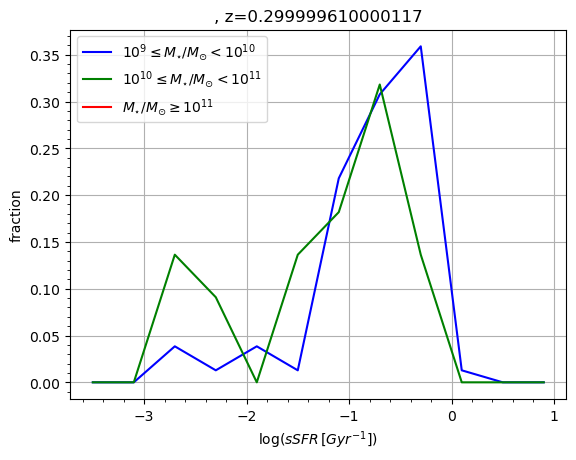

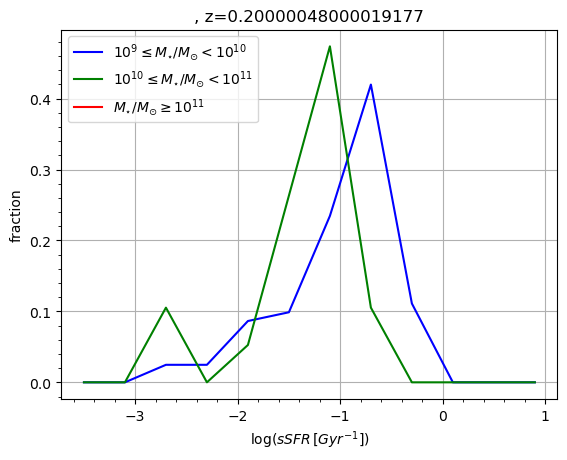

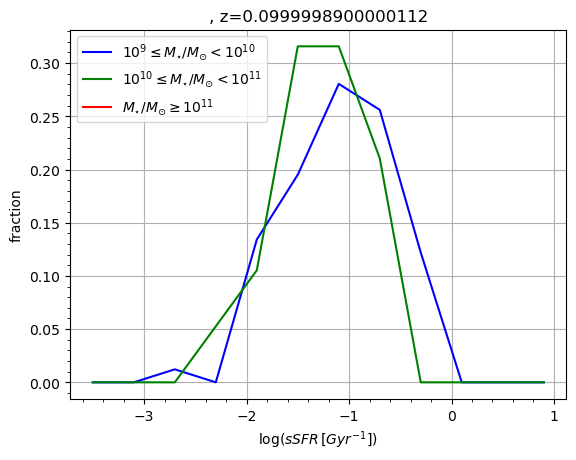

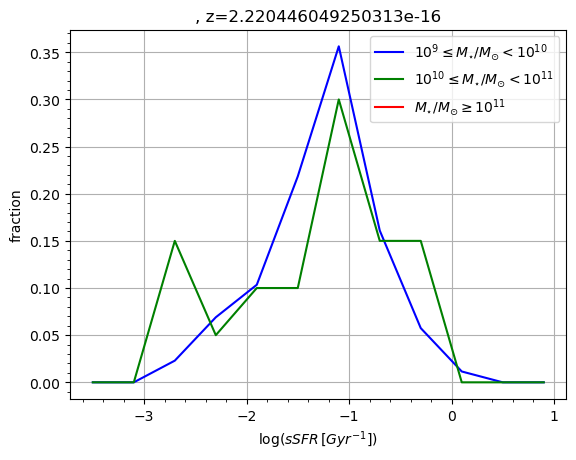

In [35]:
plt.clf()

for redshift in redshifts:
    
    # Split into three stellar mass bins (and +9 to convert from yr^-1 to Gyr^-1)
    log_ssfr_tot = log_ssfr['gal_inst'][str(redshift)]
    
#    log_ssfr_low_mass_bin = log_ssfr['gal_inst'][str(redshift)][np.where(np.logical_and(
#        log_gal_masses['stellar'][str(redshift)]>9, log_gal_masses['stellar'][str(redshift)]<10))] + 9
    log_ssfr_low_mass_bin = log_ssfr['gal_inst'][str(redshift)][np.logical_and(
        log_gal_masses['stellar'][str(redshift)]>=9., log_gal_masses['stellar'][str(redshift)]<10.)]# + 9
#    log_ssfr_mid_mass_bin = log_ssfr['gal_inst'][str(redshift)][np.where(np.logical_and(
#        log_gal_masses['stellar'][str(redshift)]>10, log_gal_masses['stellar'][str(redshift)]<11))] + 9
    log_ssfr_mid_mass_bin = log_ssfr['gal_inst'][str(redshift)][np.logical_and(
        log_gal_masses['stellar'][str(redshift)]>=10., log_gal_masses['stellar'][str(redshift)]<11.)]# + 9
    log_ssfr_high_mass_bin = log_ssfr['gal_inst'][str(redshift)][log_gal_masses['stellar'][str(redshift)]>=11.]# + 9

    #np.where((log_gal_masses['stellar']['0.0999998900000112']<10) & (log_gal_masses['stellar']['0.0999998900000112']>9))
    #np.where(np.logical_and(log_gal_masses['stellar']['0.0999998900000112']<10, log_gal_masses['stellar']['0.0999998900000112']>9))

    # Sanitize values of -infs
    log_ssfr_tot = log_ssfr_tot[np.isfinite(log_ssfr_tot)]
    log_ssfr_high_mass_bin = log_ssfr_high_mass_bin[np.isfinite(log_ssfr_high_mass_bin)]
    log_ssfr_mid_mass_bin = log_ssfr_mid_mass_bin[np.isfinite(log_ssfr_mid_mass_bin)]
    log_ssfr_low_mass_bin = log_ssfr_low_mass_bin[np.isfinite(log_ssfr_low_mass_bin)]


#    dlog_ssfr = 0.4
#    bins = np.arange(-5, 2+dlog_ssfr, dlog_ssfr)
#    counts_low, edg_low = np.histogram(log_ssfr_low_mass_bin, bins=bins)
#    counts_mid, edg_mid = np.histogram(log_ssfr_mid_mass_bin, bins=bins)
#    counts_high, edg_high = np.histogram(log_ssfr_high_mass_bin, bins=bins)
#    logssfr_ax   = edg_low[0:-1] + dlog_ssfr/2.
    #log_Phi_ = np.log10(Phi_ / Vcom_ / dlogSFR_)
    
    dlog_ssfr = 0.4
    bin_quenched = np.linspace(-200, -2.5, 2)
#    print(bin_quenched)
    bins_sf = np.arange(-2.5, -2.5+10*dlog_ssfr, dlog_ssfr)
#    print(bins_sf)
    bins = np.unique(np.append(bin_quenched, bins_sf))
    #bins = np.array(list(bin_quenched) + list(bins_sf))
#    print(bins)
    
    counts_tot, edg_tot = np.histogram(log_ssfr_tot, bins=bins)
    counts_low, edg_low = np.histogram(log_ssfr_low_mass_bin, bins=bins)
    counts_mid, edg_mid = np.histogram(log_ssfr_mid_mass_bin, bins=bins)
    counts_high, edg_high = np.histogram(log_ssfr_high_mass_bin, bins=bins)
    
    log_ssfr_ax = 0.5*(edg_tot[1:] + edg_tot[:-1])
#    print(log_ssfr_ax)

    bins_plotting = np.arange(bins_sf[0]-3*dlog_ssfr, bins_sf[-1]+dlog_ssfr, dlog_ssfr)
#    print(bins_plotting)
    log_ssfr_ax_plotting = bins_plotting[0:-1] + dlog_ssfr/2.

    counts_tot_plotting = np.append([0,0], counts_tot)
    counts_low_plotting = np.append([0,0], counts_low)
    counts_mid_plotting = np.append([0,0], counts_mid)
    counts_high_plotting = np.append([0,0], counts_high)

#    frac_tot_plotting = counts_tot_plotting/sum(counts_tot_plotting)
#    frac_low_plotting = counts_low_plotting/sum(counts_low_plotting)
#    frac_mid_plotting = counts_mid_plotting/sum(counts_mid_plotting)
#    frac_high_plotting = counts_high_plotting/sum(counts_high_plotting)
    
    frac_tot_plotting = counts_tot_plotting/len(log_ssfr_tot)
    frac_low_plotting = counts_low_plotting/len(log_ssfr_low_mass_bin)
    frac_mid_plotting = counts_mid_plotting/len(log_ssfr_mid_mass_bin)
    frac_high_plotting = counts_high_plotting/len(log_ssfr_high_mass_bin)


    plt.xlabel(r'$\log(sSFR\,[Gyr^{-1}])$')
    plt.ylabel(r'fraction')
    plt.title(r'%s, z=%s' % (cali_num, redshift))
    plt.grid()
    plt.minorticks_on()

#    plt.plot(logssfr_ax, counts_low, ls='-', color='blue', label=r'$10^9 < M_{\star} < 10^{10}$')
#    plt.plot(logssfr_ax, counts_mid, ls='-', color='green', label=r'$10^{10} < M_{\star} < 10^{11}$')
#    plt.plot(logssfr_ax, counts_high, ls='-', color='red', label=r'$M_{\star} > 10^{11}$')
    
    plt.plot(log_ssfr_ax_plotting, frac_low_plotting, ls='-', color='blue', label=r'$10^9 \leq M_{\star}/M_{\odot} < 10^{10}$')
    plt.plot(log_ssfr_ax_plotting, frac_mid_plotting, ls='-', color='green', label=r'$10^{10} \leq M_{\star}/M_{\odot} < 10^{11}$')
    plt.plot(log_ssfr_ax_plotting, frac_high_plotting, ls='-', color='red', label=r'$M_{\star}/M_{\odot} \geq 10^{11}$')

    #plt.hist(log_ssfr_low_mass_bin, bins=15, weights=[1/len(log_ssfr_low_mass_bin)]*len(log_ssfr_low_mass_bin), histtype='step', log=False, color='blue', label=r'$10^9 < M_{\star} < 10^{10}$')
    #plt.hist(log_ssfr_mid_mass_bin, bins=15, weights=[1/len(log_ssfr_mid_mass_bin)]*len(log_ssfr_mid_mass_bin), histtype='step', log=False, color='green', label=r'$10^{10} < M_{\star} < 10^{11}$')
    #plt.hist(log_ssfr_high_mass_bin, bins=15, weights=[1/len(log_ssfr_high_mass_bin)]*len(log_ssfr_high_mass_bin), histtype='step', log=False, color='red', label=r'$M_{\star} > 10^{11}$')
    plt.legend()
    plt.show()
    #print(log_ssfr_low_mass_bin)
    #print([1/len(log_ssfr_low_mass_bin)]*len(log_ssfr_low_mass_bin))

## Cosmic Star Formation Rate Density (from SFR.txt file)

In [8]:
data_SFRtxt = np.genfromtxt(os.path.join(snap_dir, 'SFR.txt'))

In [9]:
time_SFRtxt = data_SFRtxt[:,1] * 9.778131e+05  # Myr
z_SFRtxt = data_SFRtxt[:,3]
total_Mstar_SFRtxt = data_SFRtxt[:,4] * 1.000000e+10  # Msun
SFR_active_SFRtxt = data_SFRtxt[:,5] * 1.022690e-02  # Msun/yr
SFRdt_active_SFRtxt = data_SFRtxt[:,5] * 1.000000e+10  # Msun
SFR_total_SFRtxt = data_SFRtxt[:,5] * 1.022690e-02  # Msun/yr

In [10]:
SFRD_active_SFRtxt = SFR_active_SFRtxt/Vcom
SFRD_total_SFRtxt = SFR_total_SFRtxt/Vcom

/home/b/babul/aspadawe/miniconda3/envs/yt_swift_caesar/lib/python3.9/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


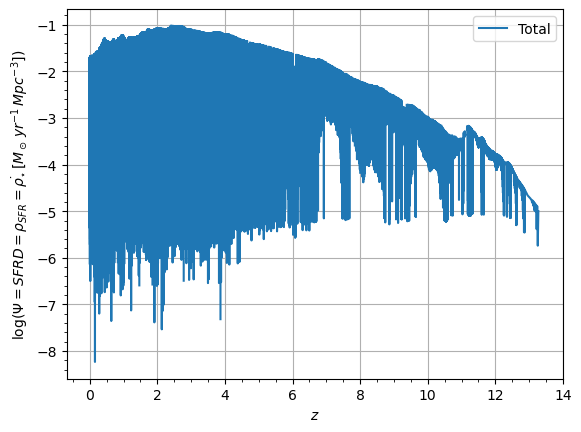

In [11]:
#fig, ax = plt.subplots()
plt.clf()
#plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log(\Psi=SFRD=\rho_{SFR}=\dot{\rho_{\star}}\, [M_\odot\, yr^{-1}\, Mpc^{-3}])$')
plt.title(r'%s' % (cali_num))
plt.grid()
plt.minorticks_on()
#plt.plot(z_SFRtxt, np.log10(SFRD_active_SFRtxt), ls='-', label=r'Active')
plt.plot(z_SFRtxt, np.log10(SFRD_total_SFRtxt), ls='-', label=r'Total')
plt.legend()
plt.show()